In [1]:
import csv 
FILE='LADATA'
f=open(FILE)
out=[]
for line in f:
    out.append(line)

In [2]:
f.close()

In [3]:
f=open("FILE",'w')

In [4]:
f.writelines(out)

In [5]:
f.close()

In [6]:
#18 commas before desc

In [7]:
f=open(FILE)
out=[]
INFO=[]
for line in f:
    templist=line.split(",")
    INFO.append([templist[16],templist[19],templist[20],templist[21],templist[22],templist[23],templist[24]])
    

In [8]:
INFO=INFO[2:]

In [9]:
import sys
import numpy as np
data=INFO

DIM=[0,31,28,31,30,31,30,31,31,30,31,30,31]#days in each month
for I in range(len(data)):
    D_T=data[I][0]
    date=D_T.split()
    day=date[0].split("/")#day is just d/m/y
    day[0]=int(day[0])*DIM[int(day[0])]#mult month by num of days in month
    day[2]=365*int(day[2])#years to days
    day=day[0]+int(day[1])+day[2]#all in days
    time=date[1].split(":")
    time[0]=int(time[0])*60
    time=int(time[1])+time[0]#time in minutes
    day=day*24*60#days in minutesa
    data[I][0]=day+time

In [10]:
data.sort(key=lambda x:x[0])
center=data[0][0]
for time in range(len(data)):
    data[time][0]=data[time][0]-center

In [11]:
for I in range(len(data)):
    
    for i in range(6):
        if data[I][i+1]!='':
            data[I]=[data[I][0],data[I][i+1]]
            break
    if len(data[I])!=2:
        data[I]=[data[I][0],"compute"]

In [12]:
import sys
import import_ipynb
import csv
import torch.nn
from tqdm import tqdm_notebook as tqdm
from collections import Counter
import matplotlib.pyplot as plt

WHOLE_FILE=[]
DATA=[]
for LMAO in data:
    LINE=" ".join(str(x) for x in LMAO)
    DATA.append(LINE.split(None,1))
    LINE=''.join(s for s in LINE if ord(s)>31 and ord(s)<126)
    TEMP_l=LINE.split(None, 1)
    WHOLE_FILE.append(str(TEMP_l[1]))
    
COUNT=Counter(WHOLE_FILE)

In [13]:
DATA=[[I[0],''.join(s for s in I[1] if ord(s)>31 and ord(s)<126)] for I in DATA]
TIMES=[]
counter=0
for KEY in COUNT.keys():
    TIMES.append([KEY,[]])
    for ITER in range(len(DATA)):
        if str(KEY) in DATA[ITER]:
            TIMES[counter][1].append(DATA[ITER][0])
    counter+=1

In [14]:
HISTOGRAM_STUTTER=10000 #Check hour by hour
#3952544 largest
myrange=range(0,5407199)

TEMP=len(TIMES)*[0]
for i in tqdm(myrange[::HISTOGRAM_STUTTER]):
    for list_location in range(len(TEMP)):
        if TEMP[list_location]==0:
            TEMP[list_location]=[TIMES[list_location][0],[int(I) for I in TIMES[list_location][1] if (int(I)>=i and int(I)<=i+HISTOGRAM_STUTTER)]]
        else:
            TEMP[list_location].append([int(I) for I in TIMES[list_location][1] if int(I)>=i and int(I)<=i+HISTOGRAM_STUTTER])

In [15]:
PLOTTER=[]
for error in TEMP:
    placeholder=[]
    for array in error[1:]:
        placeholder.append(len(array))
    PLOTTER.append([error[0],placeholder])

In [16]:
QUASAR=[]
for vec in PLOTTER:
    Dict={}
    for num in range(len(vec[1])):
        Dict[num]=vec[1][num]
    QUASAR.append([vec[0],Dict])

In [17]:
LEG=[str(I[0])for I in QUASAR]

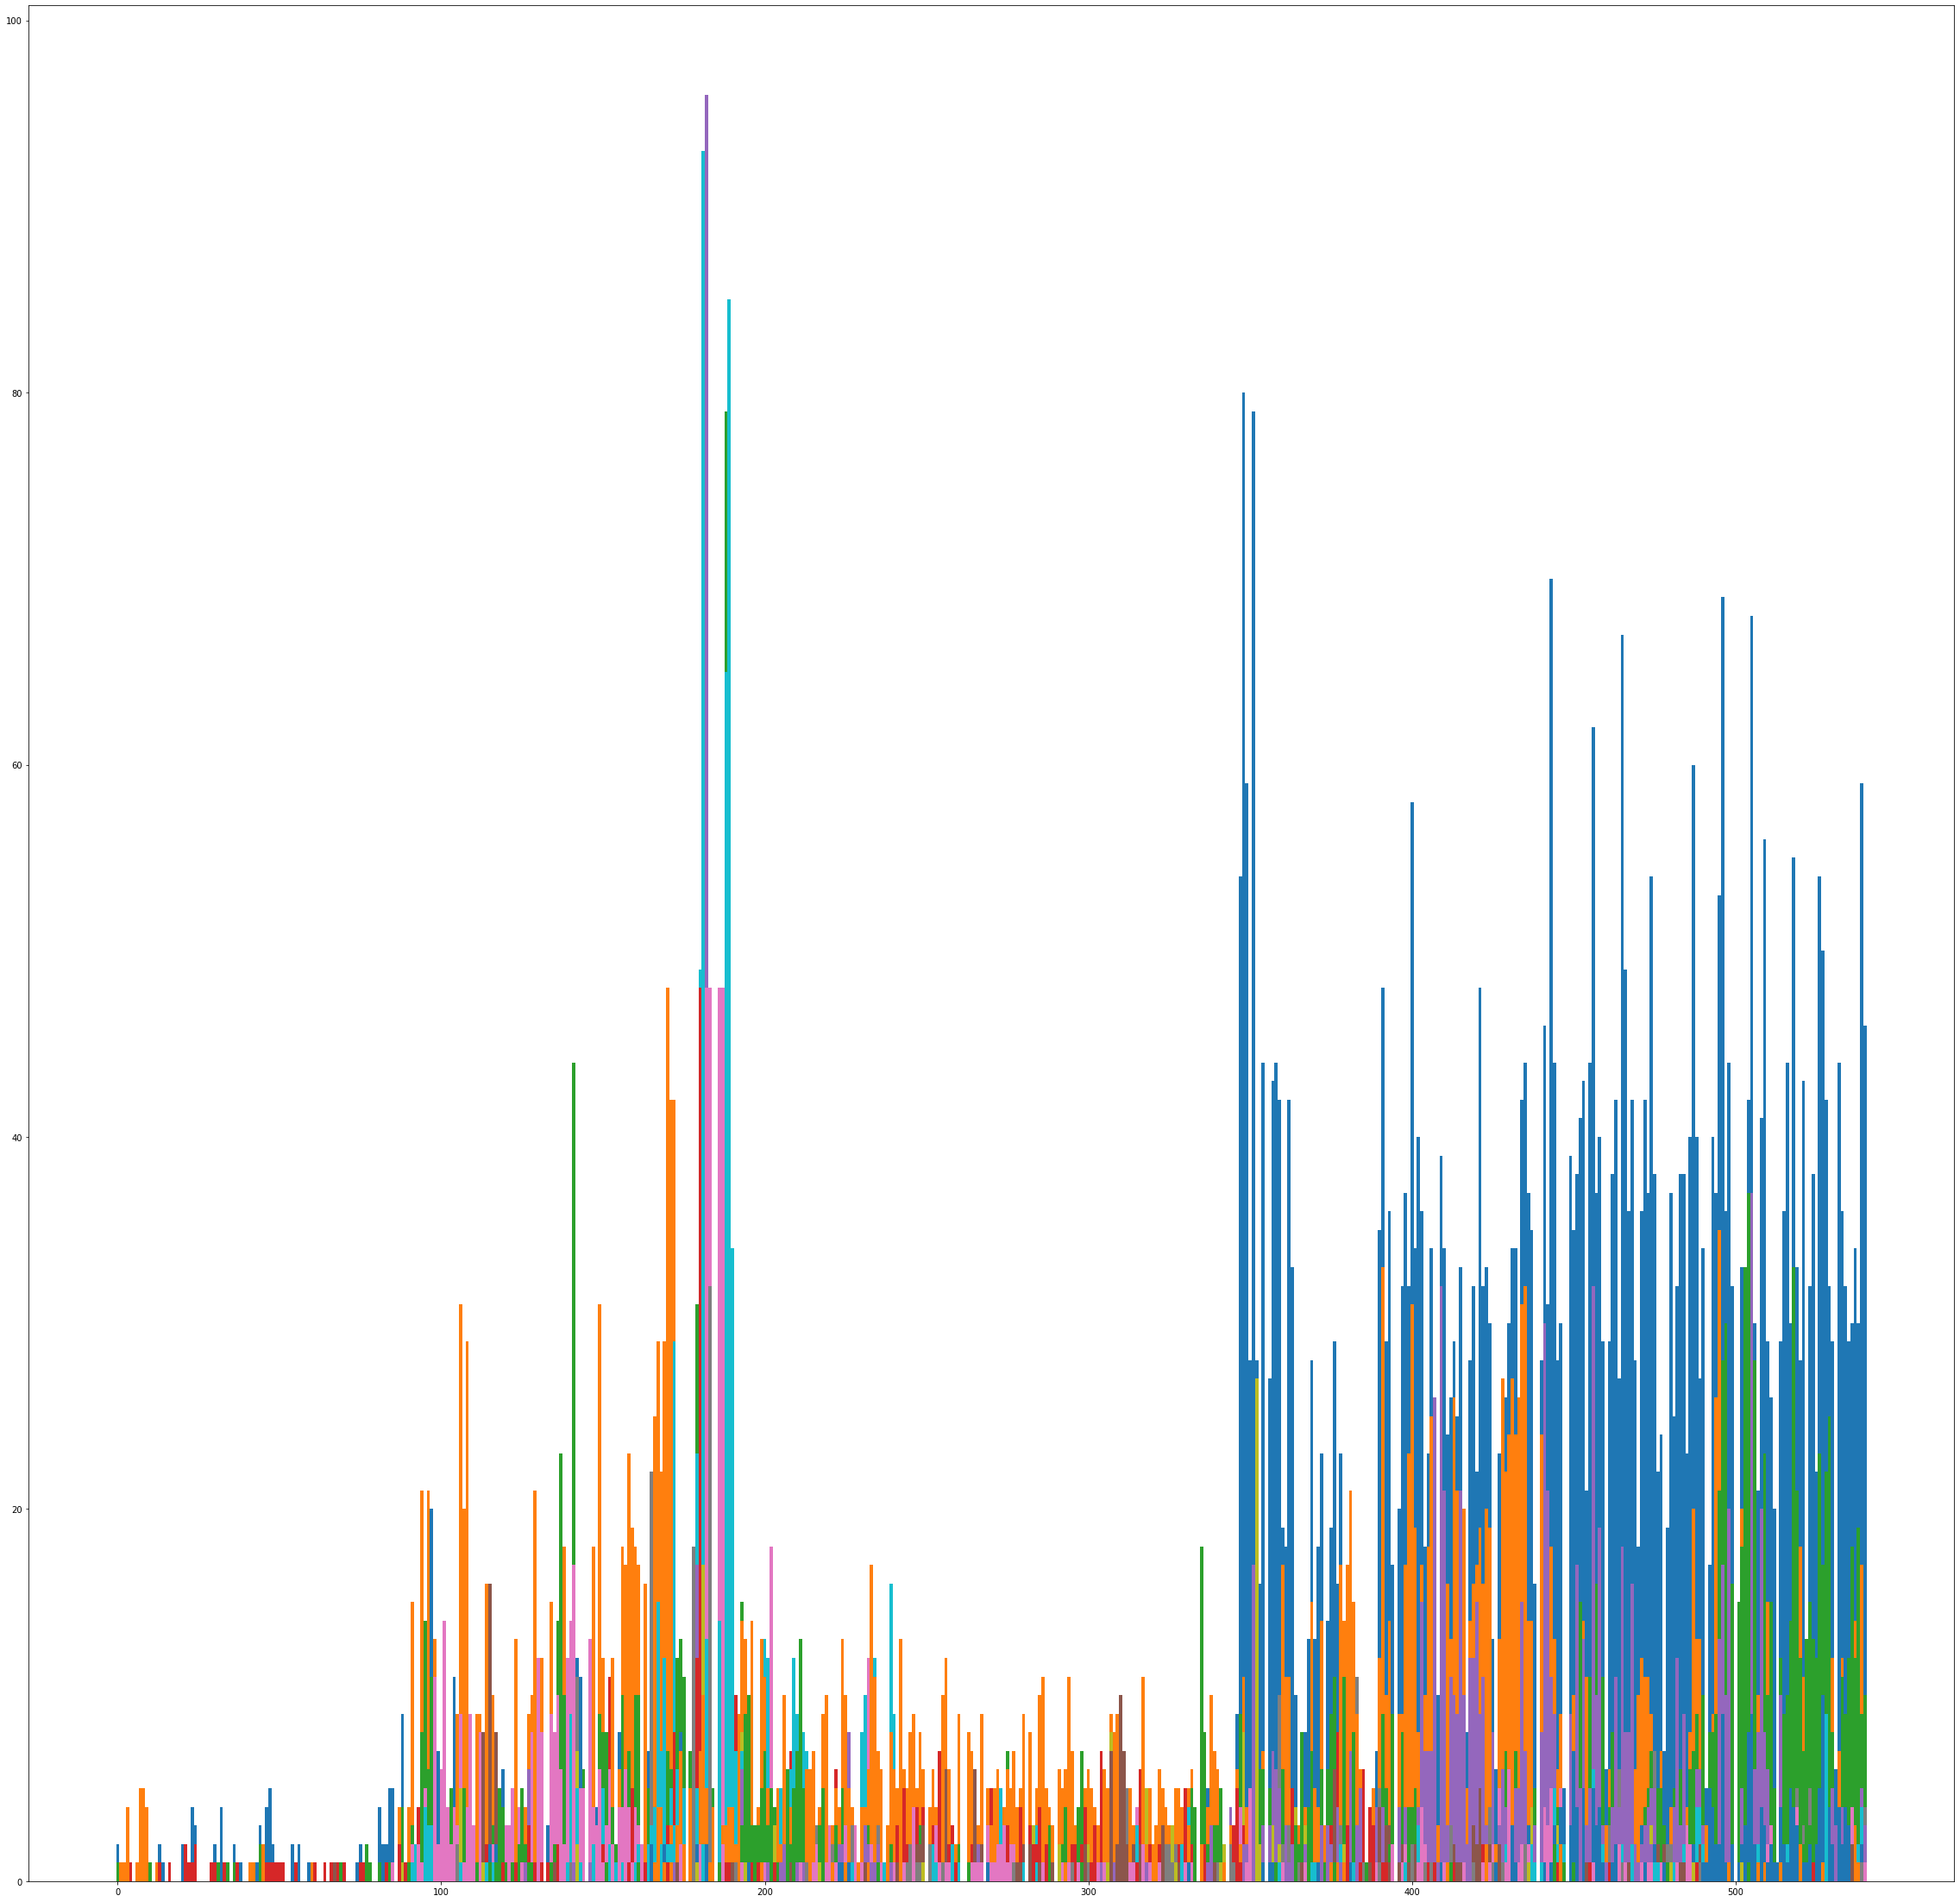

<Figure size 2880x2880 with 0 Axes>

In [18]:
#PLOT THE GRAPHS
oldnum=0

plt.figure(figsize=(40,40))
for num in tqdm(range(len(QUASAR))):
    plt.bar(QUASAR[num][1].keys(),QUASAR[num][1].values(), 1)
    
#plt.legend(LEG,loc=4)
plt.figure(figsize=(40,40))
plt.show()